In [2]:
# import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import string
from collections import defaultdict
%matplotlib inline

import numpy as np
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('./deaths_arrests.csv')
data.head()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,2.0,NaN,3.0,NaN,...,1921.8,5.3,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.0,11.8,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900,6.3


In [4]:
reduced_data = data[data.columns[21:28]]
reduced_data

,Black-White Dissimilarity Index (2010),Murder and\nnonnegligent manslaughter,Murder Rate,Avg Annual Police Homicide Rate,Avg Annual Police Homicide Rate for Black People,Avg Annual Police Homicide Rate for White People,Avg Annual Police Homicide Rate for Hispanic People
0,28.48,30,5.5,8.4,28.8,6.8,10.1
1,27.78,14,4.2,5.5,52.2,4.6,5.6
2,34.33,12,4.1,6.4,9.3,3.9,6.5
3,39.74,13,3.6,5.1,14.9,2.6,1.4
4,74.12,93,22.1,5.1,8.3,0.9,0.0
...,...,...,...,...,...,...,...
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
type(reduced_data["Murder and\nnonnegligent manslaughter"][0])
reduced_data['Murder and\nnonnegligent manslaughter'] = reduced_data['Murder and\nnonnegligent manslaughter'].str.replace(',', '').astype(float)

df = reduced_data.dropna()

/var/folders/hs/zn_hx4797c9_gf6m85h280zr0000gn/T/ipykernel_99226/4098665311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data['Murder and\nnonnegligent manslaughter'] = reduced_data['Murder and\nnonnegligent manslaughter'].str.replace(',', '').astype(float)


                                                         PC0       PC1  \
Black-White Dissimilarity Index (2010)             -0.327986  0.292785   
Murder and\nnonnegligent manslaughter              -0.038666  0.679150   
Murder Rate                                         0.094287  0.644055   
Avg Annual Police Homicide Rate                     0.498475  0.174489   
Avg Annual Police Homicide Rate for Black People    0.482990 -0.071743   
Avg Annual Police Homicide Rate for White People    0.447877  0.045070   
Avg Annual Police Homicide Rate for Hispanic Pe...  0.446866 -0.024504   

                                                         PC2       PC3  \
Black-White Dissimilarity Index (2010)              0.671567  0.225660   
Murder and\nnonnegligent manslaughter              -0.101625 -0.158832   
Murder Rate                                        -0.275231 -0.092762   
Avg Annual Police Homicide Rate                     0.488273  0.182924   
Avg Annual Police Homicide Rate for B

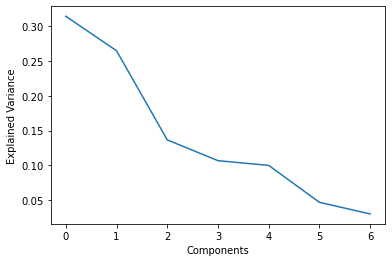

In [6]:
# normalize the data before applying the fit method
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

# reformat and view results
loadings = pd.DataFrame(pca.components_.T, columns=['PC%s' % _ for _ in range(len(df_normalized.columns))], index=df.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()